# Descriptions
- Prediksi yang dilakukan adalah klasifikasi untuk target churn (1-Yes atau 0-No) dan regresi untuk target tenure.
- Prediksi dengan klasifikasi menggunakan model machine learning
- Prediksi dengan regresi menggunakan model machine learning

# Import modules

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import graphviz

# Initialize and load dataset
Terdapat tiga dataset, antara lain:
- EDA dataset, yaitu dataset yang telah bersih dari outlier, missing, duplikat, dan mismatch. Siap untuk digunakan untuk eksplorasi.
- Feature engineering dataset, yaitu dataset hasil dari feature engineering yang meliputi, feature transformation, feature extraction, dan feture selection. Dataset terbagi lagi atas 2, yaitu untuk model classification dan model regression.
- PCA dataset adalah hasil reduki fitur menggunakan metode PCA (Principal Component Analysis).

## EDA

In [2]:
EDA_train_df = pd.read_csv('../datasets/train/EDA_train.csv')
EDA_test_df = pd.read_csv('../datasets/test/EDA_test.csv')

## Feature Engineering

### Classification Model

In [3]:
feature_engineering_classification_train_df = pd.read_csv('../datasets/train/feature_engineering_classification_train.csv')
feature_engineering_classification_test_df = pd.read_csv('../datasets/test/feature_engineering_classification_test.csv')

### Regression Model

In [4]:
feature_engineering_regression_train_df = pd.read_csv('../datasets/train/feature_engineering_regression_train.csv')
feature_engineering_regression_test_df = pd.read_csv('../datasets/test/feature_engineering_regression_test.csv')

## PCA

In [5]:
PCA_train_df = pd.read_csv('../datasets/train/PCA_train.csv')
PCA_test_df = pd.read_csv('../datasets/test/PCA_test.csv')

# Classification

### Train Dataset

In [6]:
feature_engineering_classification_train_df

,streaming_movies,dependents,device_protection,internet_service,multiple_lines,churn
0,0,0,0,0,1,0
1,0,0,1,1,0,0
2,1,0,1,0,0,1
3,1,0,1,1,1,1
4,1,0,1,0,0,0
...,...,...,...,...,...,...
5629,0,0,1,1,1,1
5630,0,0,0,0,0,0
5631,0,0,0,2,1,0
5632,0,0,0,1,0,1


In [7]:
X_train = feature_engineering_classification_train_df.iloc[:, 0:5]

y_train = feature_engineering_classification_train_df.loc[:, 'churn']

### Test Dataset

In [8]:
X_test = feature_engineering_classification_train_df.iloc[:, 0:5]

y_test = feature_engineering_classification_train_df.loc[:, 'churn']

# Build model

## Decision Tree

### Initialize Parameter Model

In [9]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classiferb
clf = clf.fit(X_train,y_train)


### Visualizing Decision Trees

[Text(185.709375, 199.32, 'X[2] <= 0.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(120.31875000000001, 163.07999999999998, 'X[3] <= 1.5\ngini = 0.281\nsamples = 3145\nvalue = [2614, 531]'),
 Text(83.7, 126.83999999999999, 'X[3] <= 0.5\ngini = 0.351\nsamples = 1931\nvalue = [1493, 438]'),
 Text(41.85, 90.6, 'X[4] <= 0.5\ngini = 0.197\nsamples = 848\nvalue = [754, 94]'),
 Text(20.925, 54.359999999999985, 'X[0] <= 0.5\ngini = 0.177\nsamples = 561\nvalue = [506, 55]'),
 Text(10.4625, 18.119999999999976, 'gini = 0.175\nsamples = 372\nvalue = [336, 36]'),
 Text(31.387500000000003, 18.119999999999976, 'gini = 0.181\nsamples = 189\nvalue = [170, 19]'),
 Text(62.775000000000006, 54.359999999999985, 'X[0] <= 0.5\ngini = 0.235\nsamples = 287\nvalue = [248, 39]'),
 Text(52.3125, 18.119999999999976, 'gini = 0.189\nsamples = 142\nvalue = [127, 15]'),
 Text(73.2375, 18.119999999999976, 'gini = 0.276\nsamples = 145\nvalue = [121, 24]'),
 Text(125.55000000000001, 90.6, 'X[4] <= 0.5\ngin

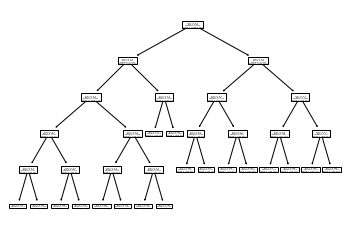

In [10]:
tree.plot_tree(clf)

### Save as PDF

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree-telco")

'tree-telco.pdf'

### Accuracy Score

In [12]:
accuracy_score(y_test, clf.predict(X_test))

0.7392616258430955

# Use Model for Predict Target Class

In [26]:
predicted = clf.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Train with 3-Folds Cross Validation

In [27]:
cross_val_score(clf, X_train, np.ravel(y_train), cv=3, scoring="accuracy")

array([0.73269436, 0.73535676, 0.74227902])

### Confusion Matrix

In [29]:
y_train_pred = cross_val_predict(clf, X_train, np.ravel(y_train), cv=3)
print(f'True positive  : {confusion_matrix(np.ravel(y_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_train), y_train_pred)[1, 0]}')

True positive  : 271
True negative  : 3880
False positive : 258
False negative : 1225


### Precision

In [30]:
print(f'Precision: {round(precision_score(np.ravel(y_train), y_train_pred, average="weighted") * 100, 2)}%')

Precision: 69.43%


### Recall

In [33]:
print(f'Recall: {round(recall_score(np.ravel(y_train), y_train_pred, average="weighted") * 100, 2)}%')

Recall: 73.68%


### F-1 Score

In [32]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_train), y_train_pred, average="weighted") * 100, 2)}%')

F-1 Score: 68.77%


### Classification Report

In [31]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      4138
           1       0.53      0.14      0.22      1496

    accuracy                           0.74      5634
   macro avg       0.64      0.55      0.53      5634
weighted avg       0.70      0.74      0.68      5634



## Optimizing Decision Tree Performance

In [23]:
# # Create Decision Tree classifer object
# clf_optimize = tree.DecisionTreeClassifier(max_depth=3)

# # Train Decision Tree Classifer
# clf_optimize = clf_optimize.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf_optimize.predict(X_test)

# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",accuracy_score(y_test, y_pred))

In [24]:
# tree.plot_tree(clf_optimize)

# Regression Model

In [17]:
feature_engineering_regression_train_df

,total_charges,contract,monthly_charges,payment_method,tenure
0,1361.85,1,64.85,3,21
1,5248.80,2,97.20,0,54
2,23.45,0,23.45,2,1
3,280.80,0,70.20,2,4
4,0.00,2,61.90,0,0
...,...,...,...,...,...
5629,95.00,0,95.00,2,1
5630,2095.30,2,91.10,1,23
5631,253.80,0,21.15,2,12
5632,1193.40,0,99.45,2,12


### Train Dataset

In [18]:
X_train_reg = feature_engineering_regression_train_df.iloc[:, 0:4]

y_train_reg = feature_engineering_regression_train_df.loc[:, 'tenure']

### Test Dataset

In [19]:
X_test_reg = feature_engineering_regression_train_df.iloc[:, 0:4]

y_test_reg = feature_engineering_regression_train_df.loc[:, 'tenure']

# Build Model

## Decision Tree

In [20]:
# Create Decision Tree Regressi object
clf_reg = tree.DecisionTreeRegressor()
# Train Decision Tree Regression
clf_reg = clf_reg.fit(X_train_reg,y_train_reg)


[Text(117.5589960625831, 211.7178947368421, 'X[0] <= 1051.725\nmse = 596.452\nsamples = 5634\nvalue = 32.373'),
 Text(29.2986328125, 200.2736842105263, 'X[0] <= 430.15\nmse = 136.261\nsamples = 2381\nvalue = 10.706'),
 Text(9.258776595744681, 188.82947368421054, 'X[0] <= 194.6\nmse = 23.839\nsamples = 1460\nvalue = 4.757'),
 Text(3.157712765957447, 177.38526315789474, 'X[0] <= 96.125\nmse = 4.139\nsamples = 918\nvalue = 2.307'),
 Text(1.4840425531914894, 165.94105263157894, 'X[2] <= 35.175\nmse = 0.728\nsamples = 624\nvalue = 1.388'),
 Text(0.725531914893617, 154.49684210526317, 'X[0] <= 53.25\nmse = 1.222\nsamples = 282\nvalue = 1.791'),
 Text(0.39574468085106385, 143.05263157894737, 'X[0] <= 36.725\nmse = 0.191\nsamples = 200\nvalue = 1.155'),
 Text(0.26382978723404255, 131.60842105263157, 'X[0] <= 9.4\nmse = 0.035\nsamples = 163\nvalue = 0.963'),
 Text(0.13191489361702127, 120.16421052631578, 'mse = 0.0\nsamples = 6\nvalue = 0.0'),
 Text(0.39574468085106385, 120.16421052631578, 'mse

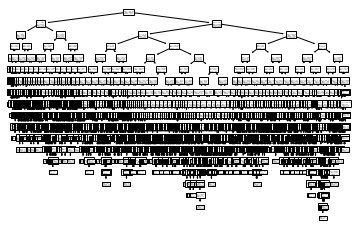

In [21]:
tree.plot_tree(clf_reg)

In [22]:
dot_data = tree.export_graphviz(clf_reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree-telco-Regression")

'tree-telco-Regression.pdf'